In [1]:
# Uncomment pyximport to compile instead of running pure python
#import pyximport; pyximport.install(language_level=3)

from matplotlib import pyplot as plt
from py_ballisticcalc import Velocity, Distance, Angular
from py_ballisticcalc import DragModel, TableG7
from py_ballisticcalc import Ammo, Unit
from py_ballisticcalc import Weapon, Shot, Calculator
from py_ballisticcalc import Settings as Set

ImportError: cannot import name 'Settings' from 'py_ballisticcalc' (/Users/marvin/Desktop/PWR ISA/sem 6/Projekt zespołowy /kolimator_project/.venv/lib/python3.11/site-packages/py_ballisticcalc/__init__.py)

In [ ]:
# Define standard .308
dm = DragModel(0.22, TableG7, 168, 0.308)
ammo = Ammo(dm, 1.22, Velocity(2600, Velocity.MPS))
print(ammo)

# Establish 100-yard zero
weapon = Weapon(4, Distance(100, Distance.Meter), 12, Angular.Mil(0))
calc = Calculator(weapon, ammo)
zero_elevation = calc.elevation
print(f'Barrel elevation for zero: {zero_elevation << Angular.MOA}')

Ammo(dm=<py_ballisticcalc.drag_model.DragModel object at 0x11e326990>, length=<Distance: 1.2 inch (1.22)>, mv=<Velocity: 2600 m/s (2600)>, temp_modifier=0, powder_temp=<Temperature: 15.0 °C (59.0)>)
Barrel elevation for zero: 3.75 moa


ext True


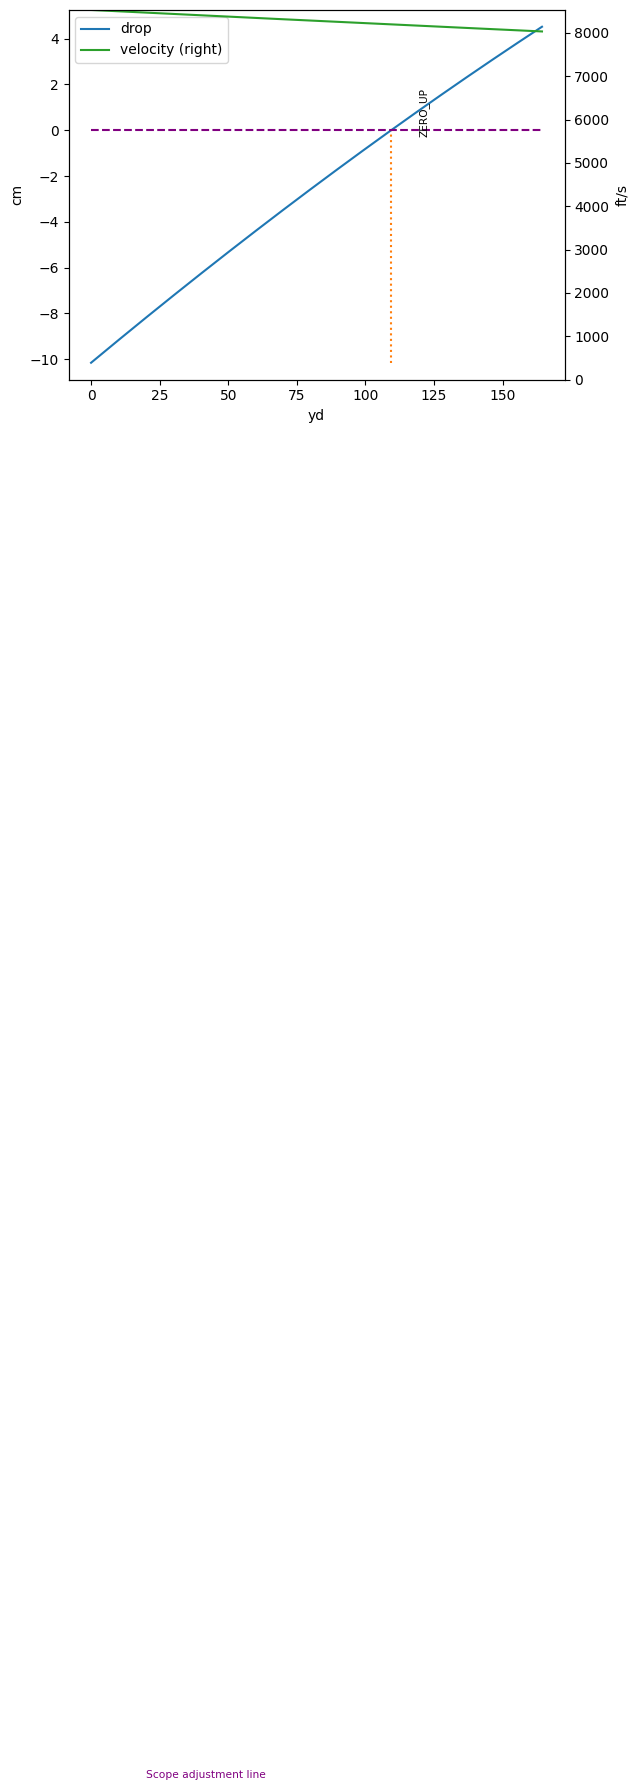

In [ ]:
# Plot trajectory out to 500 yards
shot = Shot(Distance(150, Distance.Meter), zero_angle=calc.elevation, relative_angle=Angular.Mil(0))
shot_result = calc.fire(shot, 0, extra_data=True)
ax = shot_result.plot()
# Find danger space for a half-meter tall target at 300 yards
# danger_space = shot_result.danger_space(
#     Distance.Yard(300), Distance.Meter(.5), Angular.Mil(0)
# )
# print(danger_space)
# Highlight danger space on the plot
# danger_space.overlay(ax)
plt.show()


In [ ]:
# Now find the elevation needed to hit a target at 200 yards with 10-degree look angle
weapon = Weapon(4, 200, 12, Angular.Degree(1))
calc = Calculator(weapon, ammo)
zero_elevation = calc.elevation
print(f'To hit target at {weapon.zero_distance << Set.Units.distance} sighted at a ' 
      f'{weapon.zero_look_angle << Angular.Degree} look angle, Barrel elevation={zero_elevation << Angular.Degree}')

To hit target at 200.0 yd sighted at a 1.0 ° look angle, Barrel elevation=1.0399 °


ext True


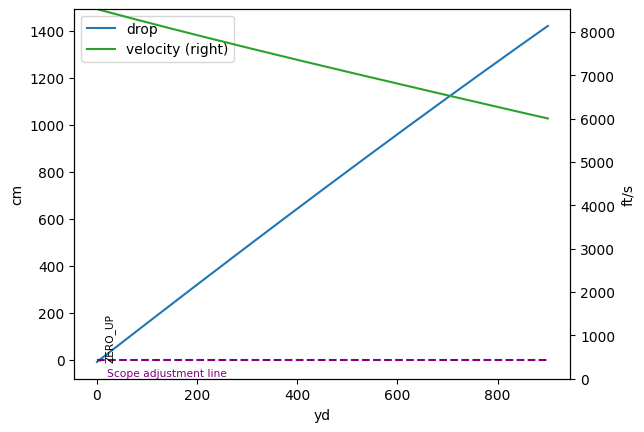

In [ ]:
shot = Shot(900, zero_angle=calc.elevation)
shot_result = calc.fire(shot, 0, extra_data=True)
ax = shot_result.plot()
# Find danger space for a target at 500 yards
# danger_space = shot_result.danger_space(
#     Distance.Yard(300), Distance.Meter(.5), calc.weapon.zero_look_angle
# )
# print(danger_space)
# # Highlight danger space on the plot
# danger_space.overlay(ax)
plt.show()

In [ ]:
shot_result.dataframe.to_clipboard()

# Plot Drag Curve

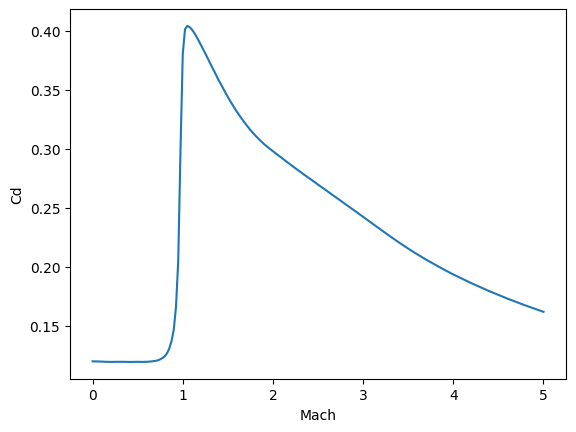

In [ ]:
import pandas
df = pandas.DataFrame(TableG7)
ax = df.plot(x='Mach', y='CD', ylabel='Cd', legend=False)
plt.show()

# Working With Units

In [ ]:
Set.Units.distance = Unit.FOOT
print(f'Default distance unit: {Set.Units.distance.name}')
# Can create value in default unit with either float or another unit of same type
print(f'\tInstantiated from float (5): {Set.Units.distance(5)}')
print(f'\tInstantiated from Distance.Line(200): {Set.Units.distance(Distance.Line(200))}')

# Ways to define value in units
# 1. old syntax
unit_in_meter = Distance(100, Distance.Meter)
# 2. short syntax by Unit type class
unit_in_meter = Distance.Meter(100)
# 3. by Unit enum class
unit_in_meter = Unit.METER(100)
print(f'100 meters: {unit_in_meter}')
# >>> 100 meters: 100.0m

# Convert unit
# 1. by .convert()
unit_in_yards = unit_in_meter.convert(Distance.Yard)
# 2. using shift syntax
unit_in_yards = unit_in_meter << Distance.Yard  # '<<=' operator also supports
print(f'100 meters in {unit_in_yards.units.key}: {unit_in_yards}')
# >>> 100 meters in yard: 109.4yd

# Get value in specified units (as float)
# 1. by .get_in()
value_in_km = unit_in_yards.get_in(Distance.Kilometer)
# 2. by shift syntax
value_in_km = unit_in_yards >> Distance.Kilometer  # '>>=' operator also supports
print(f'100 meters, value in km: {value_in_km}  (value type is {type(value_in_km)})')
# >>> 100 meters, value in km: 0.1  (value type is <class 'float'>)

# Getting unit raw value (a float)
rvalue = Distance.Meter(100).raw_value
rvalue = float(Distance.Meter(100))
print(f'100 meters in raw value: {rvalue}  (raw type is {type(rvalue)})')
# >>> 100 meters in raw value: 3937.0078740157483  (raw type is <class 'float'>)

# Comparison operators supported: < > <= >= == !=
print(f'Comparison: {unit_in_meter} == {Distance.Centimeter(100)}: {unit_in_meter == Distance.Centimeter(100)}')  # >>> False, compare two units by raw value
print(f'Comparison: {unit_in_meter} > .1*{unit_in_meter}: {unit_in_meter > .1*unit_in_meter.raw_value}')  # >>> True, compare unit with float by raw value

Default distance unit: FOOT
	Instantiated from float (5): 5.0 ft
	Instantiated from Distance.Line(200): 1.67 ft
100 meters: 100.0 m
100 meters in yard: 109.361 yd
100 meters, value in km: 0.1  (value type is <class 'float'>)
100 meters in raw value: 3937.0078740157483  (raw type is <class 'float'>)
Comparison: 100.0 m == 100.0 cm: False
Comparison: 100.0 m > .1*100.0 m: True
